In [12]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv(r'C:\Users\0974\Documents\Materi Bootcamp Machine Learning\11 sept. 2020\heart.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Doesn't Have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Who Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Doesn't Have Heart Disease: 45.54%
Percentage of Patients Who Have Heart Disease: 54.46%


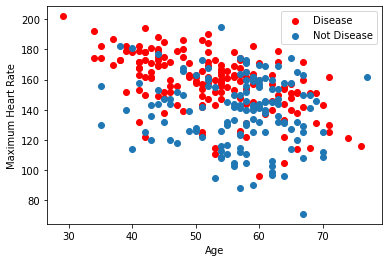

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [17]:
df.shape #data ada 303 baris dan 14 kolom

(303, 14)

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.isnull().values.any()

False

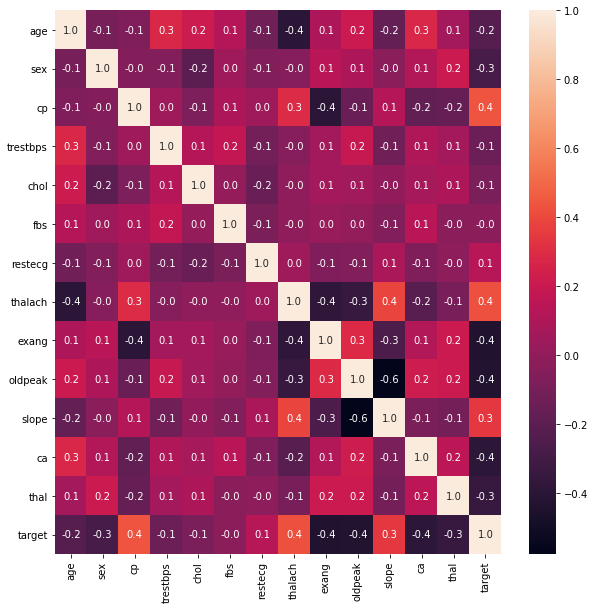

In [20]:
#Korelasi serta EDA
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

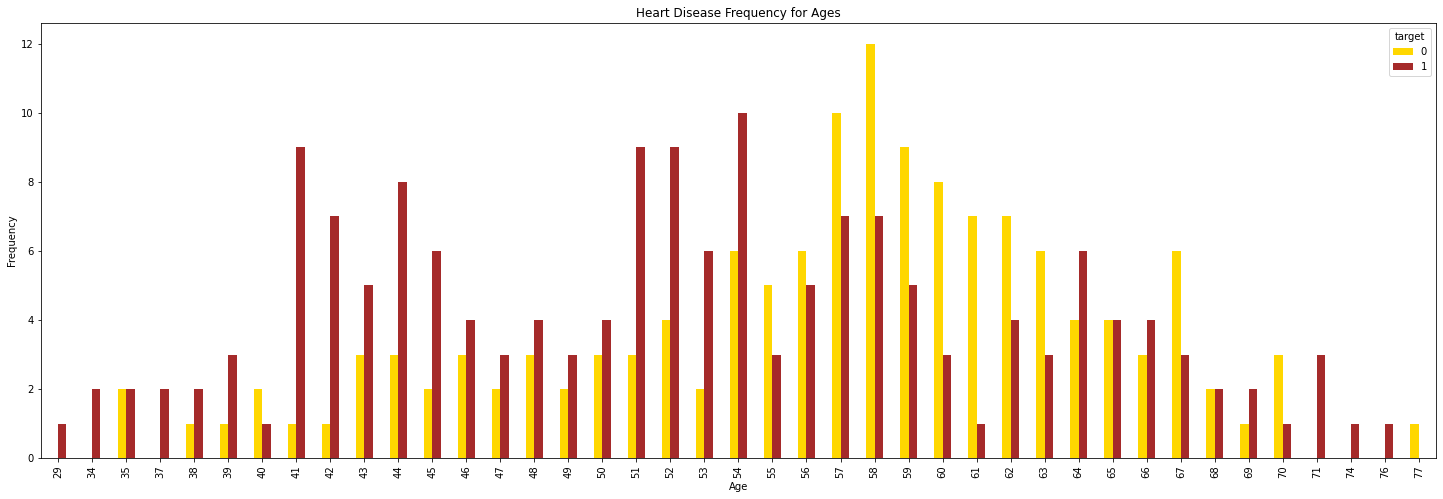

In [21]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

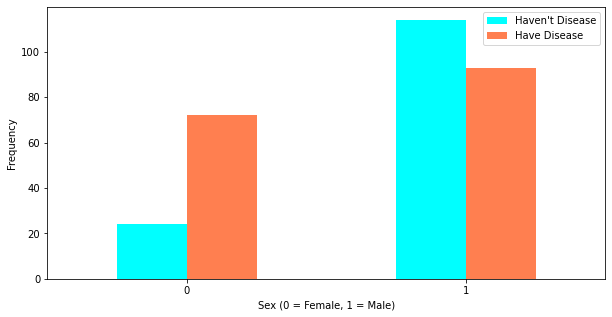

In [22]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

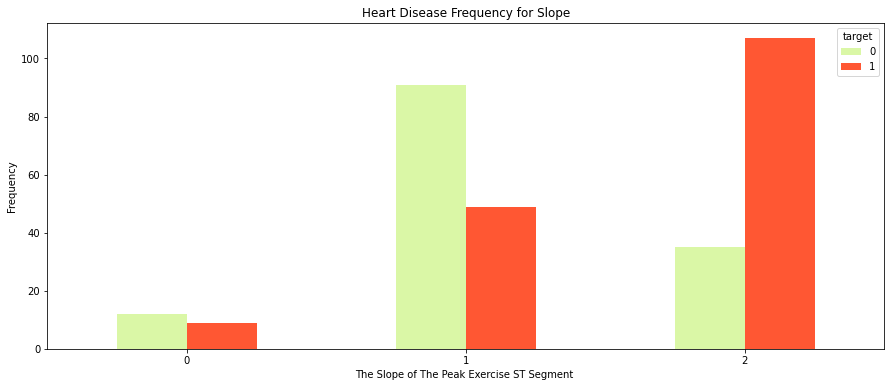

In [23]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

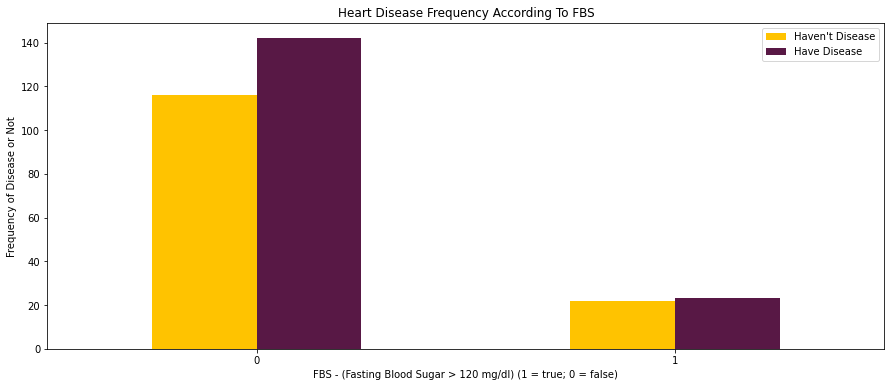

In [24]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

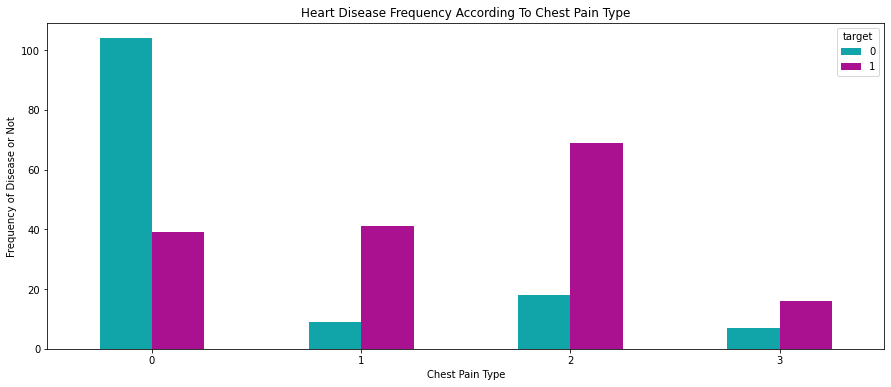

In [25]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [28]:
#Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [29]:
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [30]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [31]:
class Model:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        self.model.fit(self.X_train, self.y_train)
        print(f"{self.model_str()} Model Trained..")
        self.y_pred = self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    
    def crossValScore(self, cv=10):
        print(self.model_str() + "\n" + "="*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:  
            cv_acc = cross_val_score(self.model, 
                                     self.X_train, 
                                     self.y_train, 
                                     cv=cv, 
                                     scoring=score).mean()
            
            print("Model " + score + " : " + "%.3f" % cv_acc)
        
        
    def accuracy(self):
        accuarcy = accuracy_score(self.y_test, self.y_pred)
        print(self.model_str() + " Model " + "Accuracy is: ")
        return accuarcy
        
    def confusionMatrix(self):        
        plt.figure(figsize=(5, 5))
        mat = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(mat.T, square=True, 
                    annot=True, 
                    cbar=False, 
                    xticklabels=["Haven't Disease", "Have Disease"], 
                    yticklabels=["Haven't Disease", "Have Disease"])
        
        plt.title(self.model_str() + " Confusion Matrix")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values');
        plt.show();
        
    def classificationReport(self):
        print(self.model_str() + " Classification Report" + "\n" + "="*60)
        print(classification_report(self.y_test, 
                                    self.y_pred, 
                                    target_names=['Non Disease', 'Disease']))
    
    def rocCurve(self):
        y_prob = self.model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thr = roc_curve(self.y_test, y_prob)
        lw = 2
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, 
                 color='darkorange', 
                 lw=lw, 
                 label="Curve Area = %0.3f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='green', 
                 lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_str() + ' Receiver Operating Characteristic Plot')
        plt.legend(loc="lower right")
        plt.show()

In [32]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = Model(model=RandomForestClassifier(), X=X, y=y)

RandomForestClassifier Model Trained..


In [33]:
clf.crossValScore(cv=10)

RandomForestClassifier
Model accuracy : 0.822
Model precision : 0.829
Model recall : 0.842
Model roc_auc : 0.895


In [34]:
clf.accuracy()

RandomForestClassifier Model Accuracy is: 


0.8688524590163934

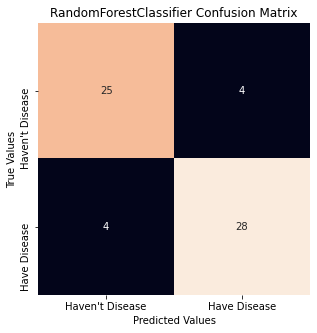

In [35]:
clf.confusionMatrix()

In [37]:
clf.classificationReport()

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.86      0.86      0.86        29
     Disease       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [38]:
#SVC Model
from sklearn.svm import SVC

svm = Model(model=SVC(C=5, probability=True), X=X, y=y)

SVC Model Trained..


In [39]:
svm.crossValScore(cv=10)

SVC
Model accuracy : 0.773
Model precision : 0.812
Model recall : 0.781
Model roc_auc : 0.870


In [40]:
svm.accuracy()

SVC Model Accuracy is: 


0.8360655737704918

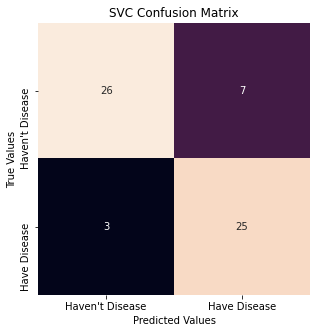

In [41]:
svm.confusionMatrix()

In [42]:
svm.classificationReport()

SVC Classification Report
              precision    recall  f1-score   support

 Non Disease       0.79      0.90      0.84        29
     Disease       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [45]:
#Pipeline Model
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

lr = LogisticRegression()
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), lr)

pln = Model(model=pipeline, X=X, y=y)

Pipeline Model Trained..


In [46]:
pln.crossValScore()

Pipeline
Model accuracy : 0.831
Model precision : 0.844
Model recall : 0.865
Model roc_auc : 0.906


In [47]:
pln.accuracy()

Pipeline Model Accuracy is: 


0.8524590163934426

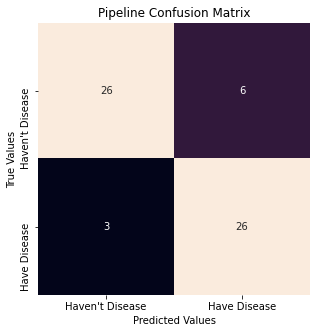

In [48]:
pln.confusionMatrix()

In [49]:
pln.classificationReport()

Pipeline Classification Report
              precision    recall  f1-score   support

 Non Disease       0.81      0.90      0.85        29
     Disease       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=15), X=X, y=y)

KNeighborsClassifier Model Trained..


In [57]:
knn.crossValScore()

KNeighborsClassifier
Model accuracy : 0.815
Model precision : 0.792
Model recall : 0.910
Model roc_auc : 0.888


In [58]:
knn.accuracy()

KNeighborsClassifier Model Accuracy is: 


0.9016393442622951

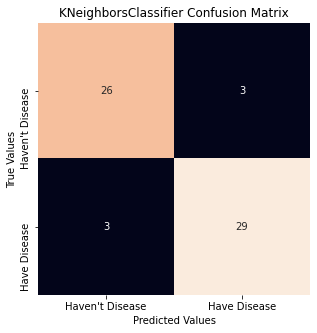

In [59]:
knn.confusionMatrix()

In [60]:
knn.classificationReport()

KNeighborsClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.90      0.90      0.90        29
     Disease       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
'''
Model dengan akurasi tertinggi adalah kNN Classifier dengan akurasi
sebesar 90%
'''